<a href="https://colab.research.google.com/github/Wendelly/project/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bergamo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Bergamo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
!pip install geopandas;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv('http://data.insideairbnb.com/italy/lombardia/bergamo/2022-09-26/visualisations/listings.csv')
a=df


## Análise dos Dados


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

**Dicionário das variáveis**

* `id` - numero de identificação do imovel
* `name` - nome do imovel
* `host_id` - id do proprietario
* `host_name` - nome do proprietario
* `neighbourhood_group` - grupo do bairro, embora não tenha valor valido no **df**
* `latitude` - coordenada de latitude do imovel
* `longitude` - coordenada de longitude do imovel
* `room_type` - tipo do quarto disponivel
* `price` - preço por noite 
* `minimun_night` - minimo de noites para a reserva
* `number_of_reviews` - numero de "avaliações" (reviews)
* `last_review` - ultima "avaliação" (reviews)
* `reviews_per_month` - "avaliações" por meses
* `calculated_host_listings_count` - contagem de imovel por host
* `availability_365` - numero de dias disponveis em 365 dias  
* `number_of_reviews_ltm ` - numero de comentarios por item
* `license` - numero da licença
* `licensa_yep` - se tem licença ou não 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15526,Residenza PALAZZO lake view,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78464,10.02629,Entire home/apt,96,3,42,2022-08-13,0.31,5,0,5,NaN
1,15542,Suite PANORAMA facing the lake,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78354,10.02471,Entire home/apt,70,3,43,2022-09-02,0.34,5,2,1,NaN
2,31412,Cute and Cosy Terrace,134937,Elena,NaN,Bergamo,45.69052,9.67099,Entire home/apt,69,1,93,2021-10-05,0.72,11,148,2,NaN
3,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.82840,10.04476,Entire home/apt,34,7,10,2022-09-18,0.19,3,291,2,CIR 016033-CNI-00002T00146
4,179345,Bossico Vicino a Montisola e lago D'iseo,588254,Angela,NaN,Bossico,45.82723,10.04484,Entire home/apt,30,7,14,2022-06-26,0.26,3,277,4,CIR 016033-CNI-00002T00146


Foi realizado uma limpeza dos dados, levando em conta que existia valores que eram outline muito fortes, o que levavam a media para muito longe da realidade. Pode observar esta parte, no Q4, onde aparece os dois DF, antes da filtragem e depois da filtragem. 

Foi criada um campo para a licensa, assim pode ser utilizada como um valor de 1 e 0 

In [ ]:
df['licensa_yep']=df['license'].notnull()

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

print("entradas: \t {}".format(df.shape[0]))
print("variaveis: \t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


entradas: 	 2712
variaveis: 	 19


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
licensa_yep                          bool
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Neste ponto decidi partir para valores com o simbolo de '%', por ficar melhor explicado a intenção dos dados, Tambem arrendondei apatir da 3 casa decimal, para deixar mais reduzido os valores, sem tirar uma certa acertabilidade no caso do host_name.

Como podemos observar, os dados referentes a neighbourhood_group, não possuem nenhuma entrada. outro ponto a se observar, é a grande ausencia de Licensa, que é um dado importante para se ter.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
f= round(((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)*100),3)
f.astype(str)+'%'


neighbourhood_group                100.0%
license                           79.941%
reviews_per_month                 14.491%
last_review                       14.491%
host_name                          0.037%
id                                   0.0%
number_of_reviews                    0.0%
number_of_reviews_ltm                0.0%
availability_365                     0.0%
calculated_host_listings_count       0.0%
price                                0.0%
minimum_nights                       0.0%
name                                 0.0%
room_type                            0.0%
longitude                            0.0%
latitude                             0.0%
neighbourhood                        0.0%
host_id                              0.0%
licensa_yep                          0.0%
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?** 

Podemos observar melhor os dados e sua distribuição, onde se consegue ver alguns ouliners, como por exemplo alguns dados de minimo de noites(minimum_nights)

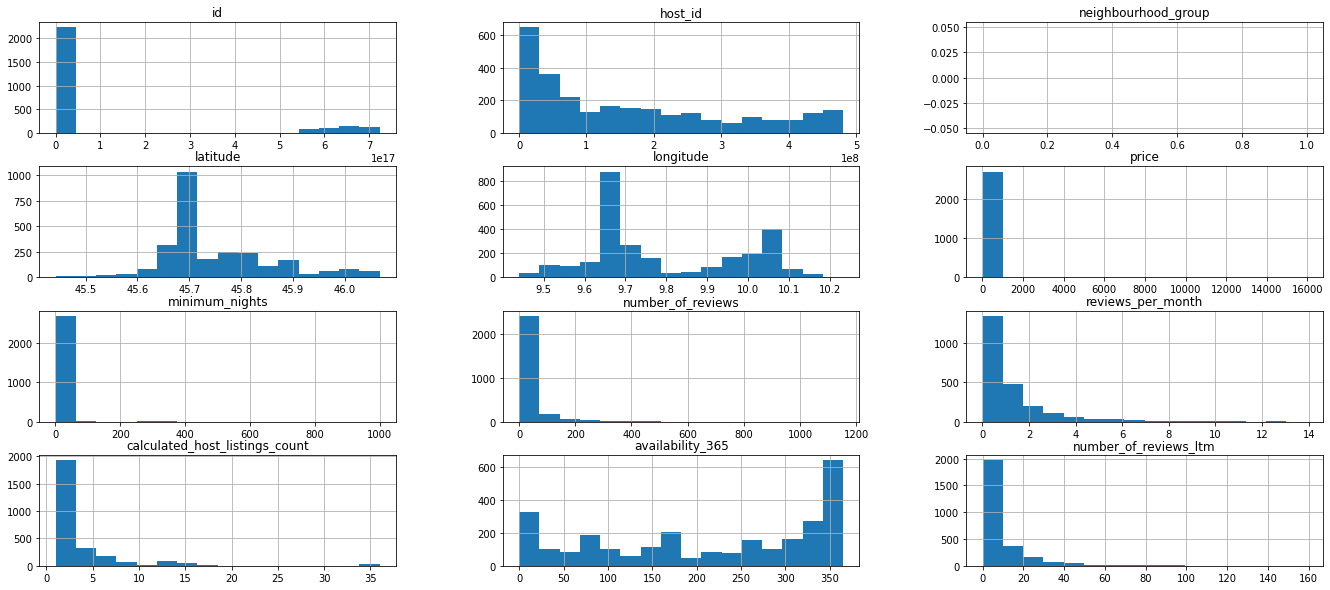

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=16,figsize=(23,10));

### **Q4. há outros outliers presentes?**

Com os dados dos **Quadils**, media e desvio padrão. 

Ao observar os dados de do 75% e o min, observamos a existencia de uma discrepancia muito grande ou não.

Existe alguns outliners, como no preço 15960 ( por noite), minimo 1000, numero de reviews 1154 ( porem demonstra que o local foi bem visitado ou é de longa data.


In [ ]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'licensa_yep']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2712.000000,2712.000000,2712.000000,2319.000000,2712.000000,2712.000000
mean,125.691372,4.563791,29.752950,1.220000,3.654130,213.488569
std,479.714320,26.756322,65.012959,1.670343,5.120228,128.733821
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,2.000000,0.210000,1.000000,90.000000
50%,78.000000,2.000000,8.000000,0.640000,2.000000,244.000000
75%,106.000000,3.000000,31.000000,1.485000,4.000000,339.000000
max,15960.000000,1000.000000,1154.000000,13.910000,36.000000,365.000000


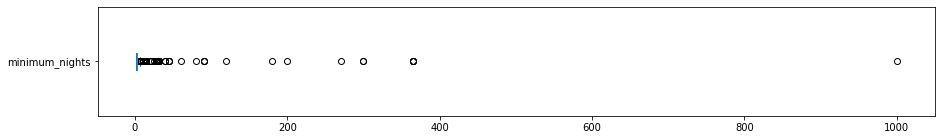


Numeros de entradas com minimo de noites, acima de 30 dias:
   25 entradas
   0.92%


In [ ]:
df.minimum_nights.plot(kind='box', vert= False, figsize = (15,2));
plt.show()
n_noites= 30
print('\nNumeros de entradas com minimo de noites, acima de {} dias:'.format(n_noites))
print('   {} entradas'.format(len(df[df.minimum_nights > n_noites ] )))
print("   {}%".format(str((len(df[df.minimum_nights > n_noites])/ df.shape[0])*100)[:4]))


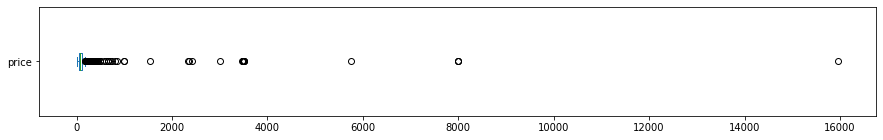


 Numeros de entradas com preços, acima de 1500 dias:
   20 entradas
   0.73%


In [ ]:
df.price.plot(kind='box', vert= False, figsize = (15,2));
plt.show()
preco= 1500
print('\n Numeros de entradas com preços, acima de {} dias:'.format(preco))
print('   {} entradas'.format(len(df[df.price > preco ] )))
print("   {}%".format(str((len(df[df.price > preco]) / df.shape[0]*100))[:4]))


## Limpeza

Na tentativa de retirar alguns outliners, vamos filtrar os dados, retirando os valores que passem de 1500 euros por noite e que o minimo passe de 30. 

As decissões para realizar isso foi apois observar os dados e utilizar um pouco de criterios pessoas. 

In [ ]:

print("As entradas com preços acima de 1500 , representão \t{} % ".format(str((len(a[a.price >1500])/len(a.price))*100)[:4]))
print("E as entradas com minimo de noites acima de 30, representão \t{} % ".format(str((len(a[a.minimum_nights >30])/len(a.price))*100)[:4]))
df_clean = df[df.price < 1500  ] 

df_clean = df_clean[df_clean.minimum_nights < 30]
print('Com esta reduzida, passamos de '+ str(len(a)) + ' para \t{} '.format(len(df_clean)))

As entradas com preços acima de 1500 , representão 	0.73 % 
E as entradas com minimo de noites acima de 30, representão 	0.92 % 
Com esta reduzida, passamos de 2712 para 	2638 


Aqui podemos ver o histograma depois da limpeza, onde demonstrar apresentar menos outliners.

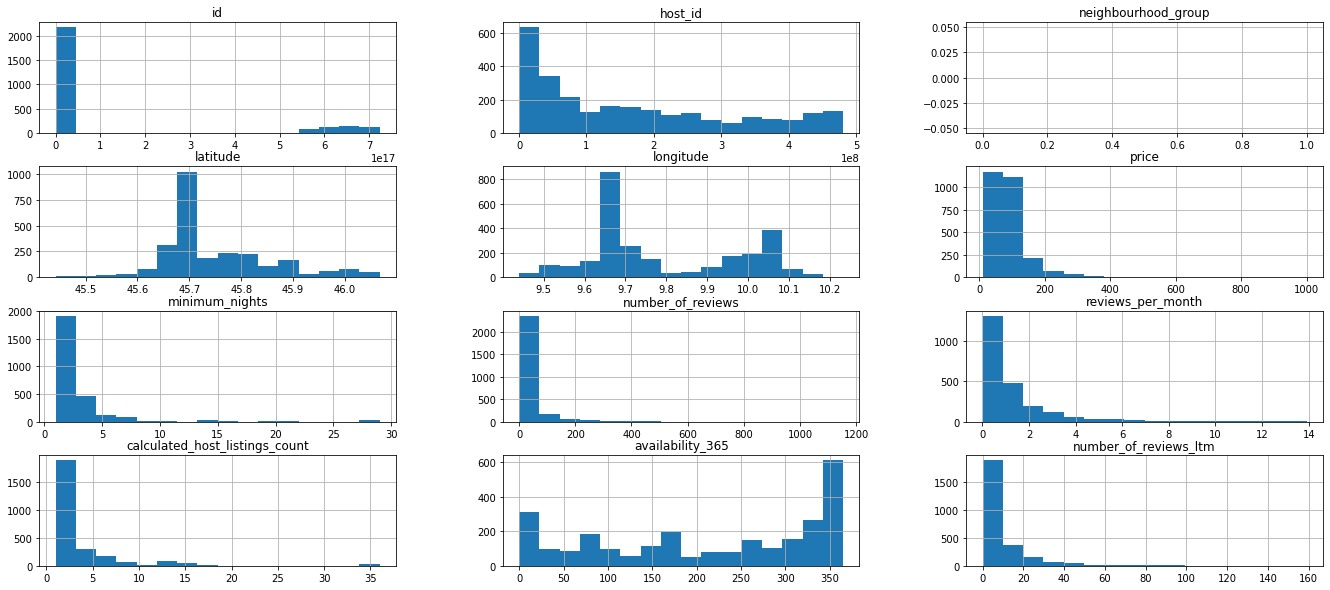

In [ ]:
df_clean.hist(bins=16,figsize=(23,10));

os graficos de box tambem demonstram um menor indice de dados fora 

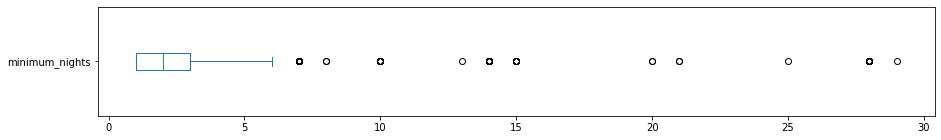


Numeros de entradas com minimo de noites, acima de 30 dias:
   0 entradas
   0.0%


In [ ]:
df_clean.minimum_nights.plot(kind='box', vert= False, figsize = (15,2));
plt.show()
n_noites= 30
print('\nNumeros de entradas com minimo de noites, acima de {} dias:'.format(n_noites))
print('   {} entradas'.format(len(df_clean[df_clean.minimum_nights > n_noites ] )))
print("   {}%".format(str((len(df_clean[df_clean.minimum_nights > n_noites])/ df_clean.shape[0])*100)[:4]))


Em preço, esses dados fora continuam, podem com uma variaça menor

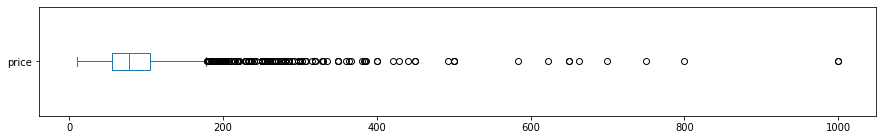


 Numeros de entradas com preços, acima de 1500 dias:
   0 entradas
   0.0%


In [ ]:
df_clean.price.plot(kind='box', vert= False, figsize = (15,2));
plt.show()
preco= 1500
print('\n Numeros de entradas com preços, acima de {} dias:'.format(preco))
print('   {} entradas'.format(len(df_clean[df_clean.price > preco ] )))
print("   {}%".format(str((len(df_clean[df_clean.price > preco]) / df_clean.shape[0]*100))[:4]))


### **Q5. Qual a média dos preços de aluguel?**

Media dos preços em reais e em euros

In [ ]:
link='https://economia.awesomeapi.com.br/last/EUR-BRL'

p=pd.read_json(link)
eua = float(p.EURBRL['low'])

In [ ]:
mean_price=round(round(df.price.mean(),2)*eua,2)

brl="R$ "
print("media do preço:\t{}".format(round(df.price.mean(),3)))
print("media do preço em BRL$:\t{}".format(brl+mean_price.astype(str).replace(".",",")))

media do preço:	125.691
media do preço em BRL$:	R$ 706,86


### **Q4. Qual a correlação existente entre as variáveis**

Aqui podemos ver o nivel de correlação entre os dados por meio do metodo Pearson, onde 1 é o maior indice possivel. 
Ao se ter resultados negativos significa que é inversamente relacionada, se for 0 não tem como estabelecer a correlação e se 1 é relacionada

Aqui não temos como definir uma relação clara entre os dados, o que melhor se aproxima são os de reviews por mese e numero de reviews. 

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','licensa_yep']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,licensa_yep
price,1.000000,-0.046317,-0.123364,-0.096591,0.144074,0.065652,0.008289
minimum_nights,-0.046317,1.000000,-0.110837,-0.178306,0.056361,-0.105416,-0.028716
number_of_reviews,-0.123364,-0.110837,1.000000,0.538622,-0.055029,-0.001174,0.089345
reviews_per_month,-0.096591,-0.178306,0.538622,1.000000,-0.029971,0.064133,-0.023348
calculated_host_listings_count,0.144074,0.056361,-0.055029,-0.029971,1.000000,-0.022291,-0.016183
availability_365,0.065652,-0.105416,-0.001174,0.064133,-0.022291,1.000000,-0.062548
licensa_yep,0.008289,-0.028716,0.089345,-0.023348,-0.016183,-0.062548,1.000000


Para melhor visualização temos um mapa de calor, para conseguir visualizar de uma forma mais ilustrativa

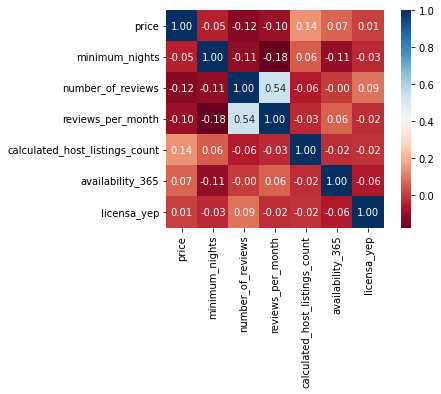

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Podemos tambem olhar os dados que achamos mais interessante para poder ver a relçao da frequencia dos mesmos. 

Neste caso, podemos ver que o preço e o minimo de noites, possuem um maior volume com o minimo de noites ate 7 noites e o valor de ate 100

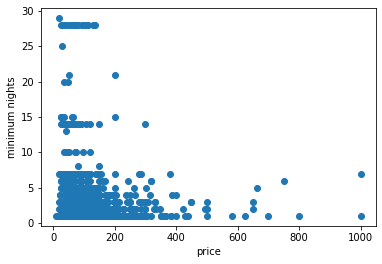

In [ ]:
plt.scatter(df_clean.price,df_clean.minimum_nights );
plt.xlabel("price");
plt.ylabel("minimum nights");

Tambem podemos ver que o licensa não possui uma grnade infuencia sobre o preço, sendo na verdade pouco encontrada com preços altos. Mas não é o suficiente para uma relação

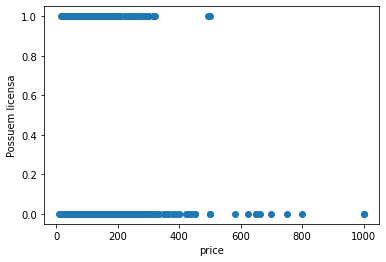

In [ ]:
plt.scatter(df_clean.price,df_clean.licensa_yep);
plt.xlabel("price");
plt.ylabel("Possuem licensa");

Neste podemos ver o tipo de quarto com relação com o preço.
vendo que quartos compartilhados possuem valores mai baixos, e apt chegam mais longe nos valores que quartos de hotel.

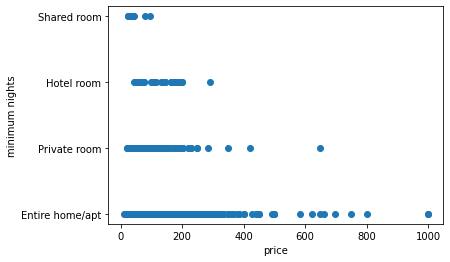

In [ ]:
plt.scatter(df_clean.price,df_clean.room_type);
plt.xlabel("price");
plt.ylabel("minimum nights");

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Listado os tipos de quarto e sua frequencia no DF, não estabelece que seja o mais alugado, mas sim o que mais aparece

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2077
Private room        515
Hotel room           37
Shared room           9
Name: room_type, dtype: int64

aqui a representação do tipo de quanto em % ao total. 
O apt e home, representam 78% do montante.

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.787339
Private room       0.195224
Hotel room         0.014026
Shared room        0.003412
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Listado os bairros e o valor medio do preço.

In [ ]:

# ver preços por bairros, na média
local=df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lurano                   330.00
Carobbio degli Angeli    300.00
Ghisalba                 269.75
Ciserano                 250.00
Almenno San Salvatore    212.50
Leffe                    212.50
Gandino                  200.00
Bianzano                 200.00
Scanzorosciate           181.40
Mezzoldo                 175.50
Name: price, dtype: float64

a plotagem em um espaço da dispoção dos imoveis e relacionado aos preços por meio das cores.

O volume de dados acabou prejudicando a visulização dos pontos.

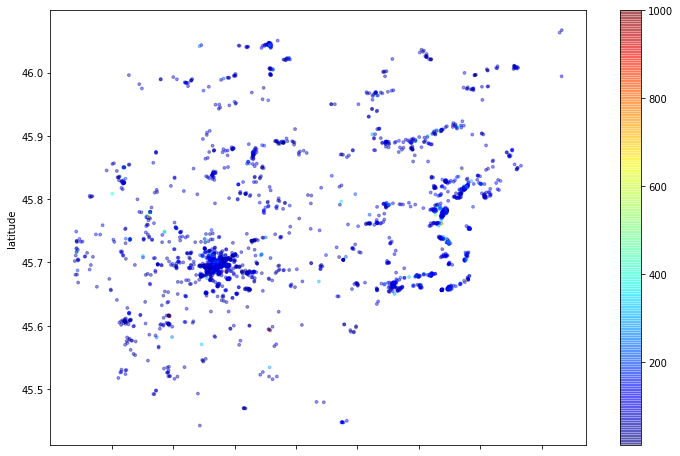

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

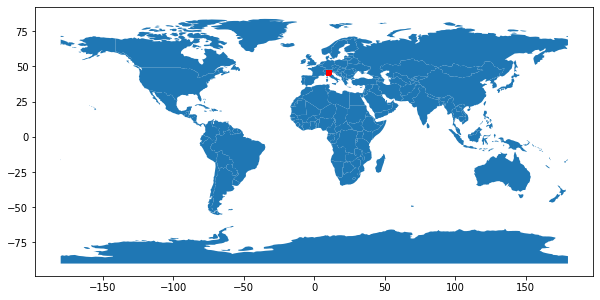

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_clean['longitude'], df_clean['latitude'])]
gdf = GeoDataFrame(df_clean, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

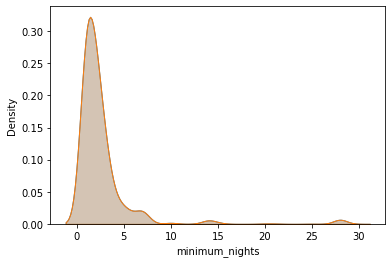

In [ ]:
for col in 'xy':
    sns.kdeplot(df_clean['minimum_nights'], shade=True)

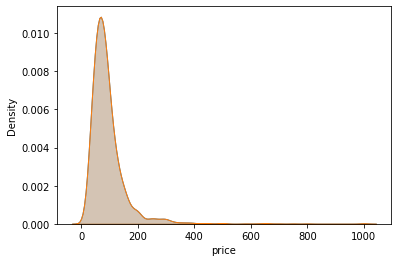

In [ ]:
for col in 'xy':
    sns.kdeplot(df_clean['price'], shade=True)

Podemos ver dois histogramas combinados, um sobre o numeros de reviws em 365 dias e outro sobre os o numero de reviws (azul) 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


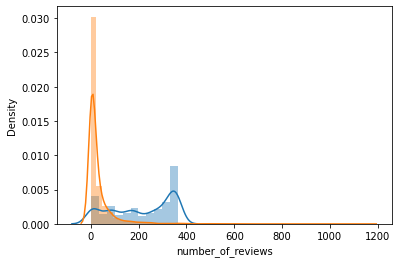

In [ ]:
sns.distplot(df_clean['availability_365']);
sns.distplot(df_clean['number_of_reviews']);

Outra visualização da distribuição dos valores, não vai ser negativo, mas é uma outra formade colocar 

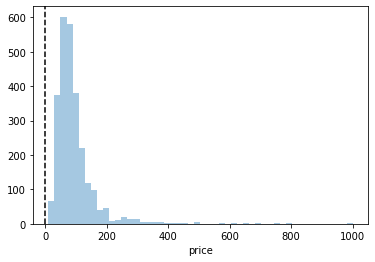

In [ ]:
sns.distplot(df_clean['price'], kde=False);
plt.axvline(0, color="k", linestyle="--");

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('A media do minimo de noites para alugar é de {} noites'.format(str(df_clean['minimum_nights'].mean())[:4]))

## Conclusões


Os dados analisados foram de um resumo, onde o valume é menor.

Desta forma não se tem como ter um resultado concreto, do que foi obtido, porem os dados trouxeram algumas informações de como esta a condição e os preços, dando uma ideia possivel para possiveis viajantes para cidade ou para pessoas que estajam pensando em se fialair ao Airbnb.